In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [4]:
#frequenze suggerite
print(np.logspace(1,2.8, 4, base=10).round(-1))
print(np.logspace(2.8,5.5, 20,base=10).round(-1)[1:])

#frequenze intorno alla frequenza di taglio
print([500,750,800,950,1000,1050,1100,1150,1300,1500])

[ 10.  40. 160. 630.]
[   880.   1210.   1680.   2340.   3240.   4490.   6230.   8650.  11990.
  16640.  23080.  32010.  44400.  61580.  85420. 118490. 164360. 227980.
 316230.]
[500, 750, 800, 950, 1000, 1050, 1100, 1150, 1300, 1500]


# Parte 1 - K=2.5

In [73]:
freq1 = [np.hstack((np.array([9.625,26.15,39.931,60.762,98.36,157.3,306.06,496.5,564.28,629.15,755.00,886.20,938.86])*10**-3,
                   np.array([1.0580,1.215,1.3025,1.5008,1.6158,2.2816,3.2393,4.4964,6.246,8.536]))),"Frequenza (kHz)"] #kHz
vin1 = [np.array([0.980,0.96,0.98,0.98,0.98,0.96,0.96,0.96,0.96,0.96,0.96,0.96,1.01,
                 0.98,0.96,0.98,0.96,1.01,0.96,0.98,0.98,0.96,0.98]),"Vin(V)"] #V
vout1 = [np.array([2.27,2.27,2.27,2.27,2.29,2.29,2.43,2.73,2.93,3.14,3.62,4.00,4.00,
                  3.58,2.65,2.21,1.51,1.25,0.58,0.34,0.22,0.16,0.14]),"Vout(V)"] #V
deltat1 = [-1*np.array([35,35,120,56,86,128,93.04,105.8,119.44,122.9,153.6,206.1,221.6,
                    262.96,277.8,283.2,267.92,256.8,186.96,139.74,108.29,78.78,53.63]),"\u03BCs"] #us

# Parte 2 - K circa 1.6

In [74]:
vin2 = [np.array([0.95,0.95,0.96,0.95,0.95,0.96,0.96,0.95,0.96,0.96,0.96,0.95,0.96,0.96,0.95,0.95,0.96,0.96,0.96,0.95,0.96,0.96,0.96,0.95,0.95]),"Vin (V)"]
vout2 = [np.array([0.95,0.95,0.95,0.95,0.93,0.93,0.9,0.84,0.810,0.8,0.75,0.7,0.68,0.64,0.59,0.56,0.52,0.5,0.39,0.29,0.2,0.16,0.13,0.09,0.08]),"Vout (V)"]
freq2 = [np.hstack((np.array([9.927,27.06,40.96,59.78,93.05,156.94,302.4,499.4,563.8,621,755.7,885.3,959])*10**-3,
                 np.array([1.0638,1.2105,1.3191,1.4880,1.6224,2.2875,3.2337,4.8730,6.170,8.4460,11.672,14.642]))),"Frequenza (kHz)"]
deltat2 = [-1*np.array([100,124,152,144,167,166.4,159.2,158.4,153.6,154.4,148.8,141.6,132.8,135.2,122.37,118.88,111.42,107.5,89.44,71.14,53.31,44.45,34.98,27.716,24.854]),"\u03BCs"]

In [110]:
def CreateFigure():
    return len(plt.get_fignums())

def printGraph(vout, vin, freq, deltat):
    plt.figure(CreateFigure())
    
    module = vout[0]/vin[0]
    plt.xscale("log")
    plt.scatter(freq[0]*10**3,20*np.log(module), label="Dati raccolti")
    plt.axhline(-3, color="red", label="-3dB")
    plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
    plt.legend()
    plt.xlabel("$\\nu$ (Hz)")
    plt.ylabel("Attenuazione (dB)")
    plt.grid()
    plt.title("Diagramma di Bode, Funzione di trasferimento")
    
    #######
    plt.figure(CreateFigure())
    
    freq_act = freq[0]*10**3
    deltat_act = deltat[0]*(10**-6)  #us
    delta_phi = ((2*np.pi*freq_act*deltat_act)*(180/np.pi))
    plt.xscale("log")
    plt.scatter(freq_act, delta_phi, label="Dati raccolti")
    plt.xlabel("$\\nu$ (Hz)")
    plt.grid()
    plt.axhline(-45, label="- 45°", color="red")
    plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
    plt.ylabel("Sfasamento (Deg)")
    plt.legend()
    plt.title("Diagramma di Bode, fase")
    
def doublebode(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2):
    fig = plt.figure(CreateFigure())
    ax1 = fig.add_subplot()
    
    module1 = vout1[0]/vin1[0]
    module2 = vout2[0]/vin2[0]
    plt.xscale("log")
    ax1.scatter(freq1[0]*10**3,20*np.log(module1), marker="o",label="Dati per K=2.5")
    ax1.scatter(freq2[0]*10**3,20*np.log(module2), marker="o", color="blue", label="Dati per K circa 1.6")
    plt.axhline(-3, color="red", label="-3dB")
    plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
    plt.legend()
    plt.xlabel("$\\nu$ (Hz)")
    plt.ylabel("Attenuazione (dB)")
    plt.grid()
    plt.title("Diagramma di Bode, Funzione di trasferimento")
    
def doublephase(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2):
    fig = plt.figure(CreateFigure())
    ax1 = fig.add_subplot()
    
    freq_act1 = freq1[0]*10**3
    freq_act2 = freq2[0]*10**3
    deltat_act1 = deltat1[0]*(10**-6)  #us
    deltat_act2 = deltat2[0]*(10**-6)  #us
    delta_phi1 = ((2*np.pi*freq_act1*deltat_act1)*(180/np.pi))
    delta_phi2 = ((2*np.pi*freq_act2*deltat_act2)*(180/np.pi))
    plt.xscale("log")
    ax1.scatter(freq_act1, delta_phi1, label="Dati per K=2.5")
    ax1.scatter(freq_act2, delta_phi2,  marker="o", color="blue", label="Dati per K circa 1.6")
    plt.xlabel("$\\nu$ (Hz)")
    plt.grid()
    plt.axhline(-45, label="- 45°", color="red")
    plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
    plt.ylabel("Sfasamento (Deg)")
    plt.legend()
    plt.title("Diagramma di Bode, fase")

# K = 2.5

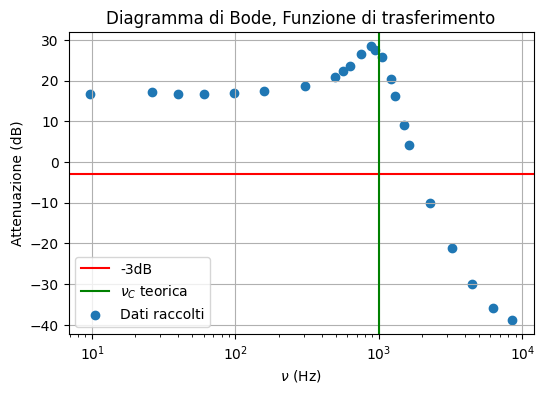

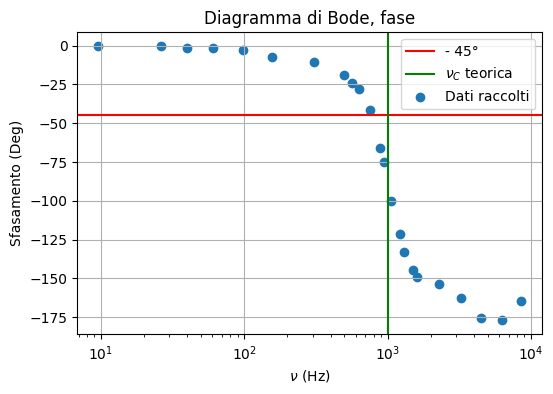

In [99]:
printGraph(vout1, vin1, freq1, deltat1)

# K circa 1.6

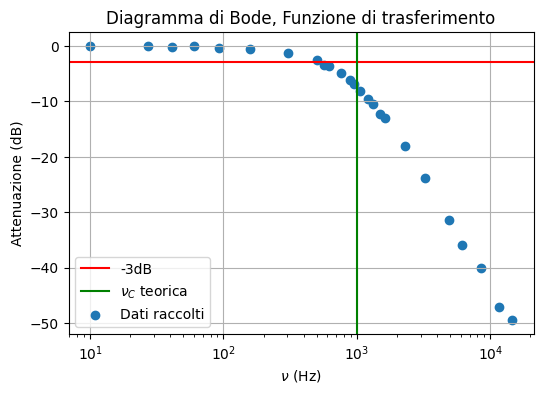

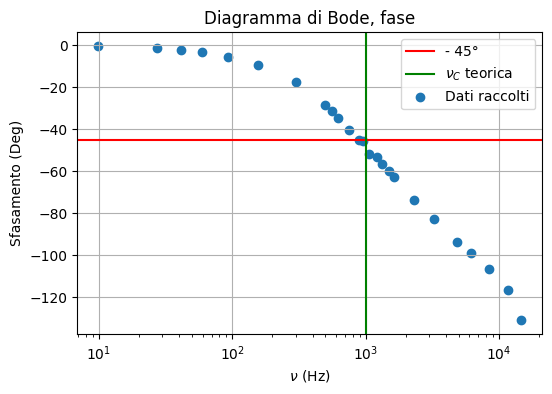

In [100]:
printGraph(vout2, vin2, freq2, deltat2)

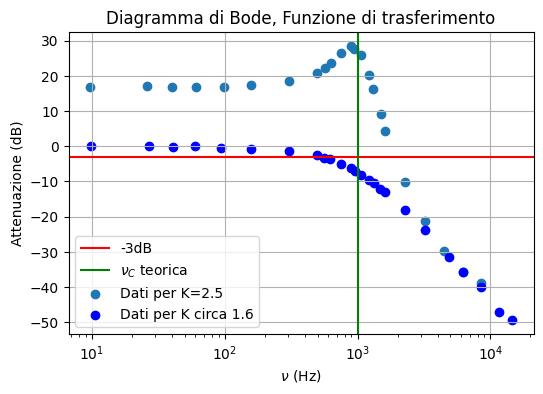

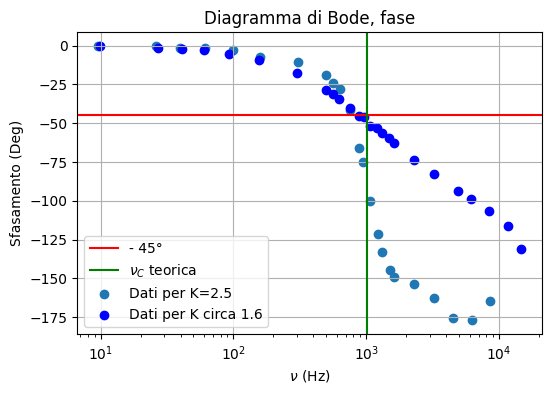

In [111]:
doublebode(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2)
doublephase(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2)

In [102]:
#gli RMS dipendono dalla tensione di alimentazione dell'OP-AMP

In [106]:
def dataFrame(freq,v_in,v_out,module,delta_t,delta_phi):
        data = [freq[0],v_in[0],v_out[0],module,delta_t[0],delta_phi]

        #FUNCTION THAT TRANSLATES THE DATA
        def DataTraslator(data):
            finaldata = []
            i = 0
            while i < buff:
                row = []
                for j in data:
                    row.append(j[i])
                finaldata.append(row)
                i += 1
            return finaldata

        #check on the sizes
        buff = 0
        flag = 0
        for i in data:
            if buff == 0:
                buff = i.size
            elif i.size != buff:
                flag = 1
                break
        if flag == 1:
            return "The data arrays must all have the same dimension" #throw exception for god's sake

        #traslate the data
        DataTraslator(data)

        df = pd.DataFrame(np.array(DataTraslator(data)),
                            columns=[freq[1],v_in[1],v_out[1],"|T(\u03C9)|",delta_t[1],"\u0394\u03C6"])
        return df.sort_values(by=[freq[1]])

In [107]:
df1 = dataFrame(freq,vin,vout,module,deltat,delta_phi).round(3)
print(df1.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 Frequenza (kHz) &  Vin (V) &  Vout (V) &  |T(ω)| &       μs &       Δφ \\
\midrule
           0.010 &     0.95 &      0.95 &   1.000 & -100.000 &   -0.357 \\
           0.027 &     0.95 &      0.95 &   1.000 & -124.000 &   -1.208 \\
           0.041 &     0.96 &      0.95 &   0.990 & -152.000 &   -2.241 \\
           0.060 &     0.95 &      0.95 &   1.000 & -144.000 &   -3.099 \\
           0.093 &     0.95 &      0.93 &   0.979 & -167.000 &   -5.594 \\
           0.157 &     0.96 &      0.93 &   0.969 & -166.400 &   -9.401 \\
           0.302 &     0.96 &      0.90 &   0.938 & -159.200 &  -17.331 \\
           0.499 &     0.95 &      0.84 &   0.884 & -158.400 &  -28.478 \\
           0.564 &     0.96 &      0.81 &   0.844 & -153.600 &  -31.176 \\
           0.621 &     0.96 &      0.80 &   0.833 & -154.400 &  -34.518 \\
           0.756 &     0.96 &      0.75 &   0.781 & -148.800 &  -40.481 \\
           0.885 &     0.95 &      0.70 &   0.737 & -141.6